In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df = pd.read_excel(r"C:/Users/yvams/Desktop/projects_mech/Steel_Plate.xlsx")

In [6]:
df.describe

<bound method NDFrame.describe of         V1    V2       V3       V4    V5  V6   V7      V8   V9  V10  ...  \
0       42    50   270900   270944   267  17   44   24220   76  108  ...   
1      645   651  2538079  2538108   108  10   30   11397   84  123  ...   
2      829   835  1553913  1553931    71   8   19    7972   99  125  ...   
3      853   860   369370   369415   176  13   45   18996   99  126  ...   
4     1289  1306   498078   498335  2409  60  260  246930   37  126  ...   
...    ...   ...      ...      ...   ...  ..  ...     ...  ...  ...  ...   
1936   249   277   325780   325796   273  54   22   35033  119  141  ...   
1937   144   175   340581   340598   287  44   24   34599  112  133  ...   
1938   145   174   386779   386794   292  40   22   37572  120  140  ...   
1939   137   170   422497   422528   419  97   47   52715  117  140  ...   
1940  1261  1281    87951    87967   103  26   22   11682  101  133  ...   

         V25     V26     V27  V28  V29  V30  V31  V32

In [7]:
print(df.isnull().sum()) # checking for missing values

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
V29      0
V30      0
V31      0
V32      0
V33      0
Class    0
dtype: int64


In [8]:
print(df.duplicated().sum()) # checking for duplicate rows

0


In [9]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'Class'],
      dtype='object')

As the dataset contains 34 columns with the first 27 columns being the input features measuring various fault characteristics and the last seven columns being the fault types, we will create a bar chart for the faulty types.

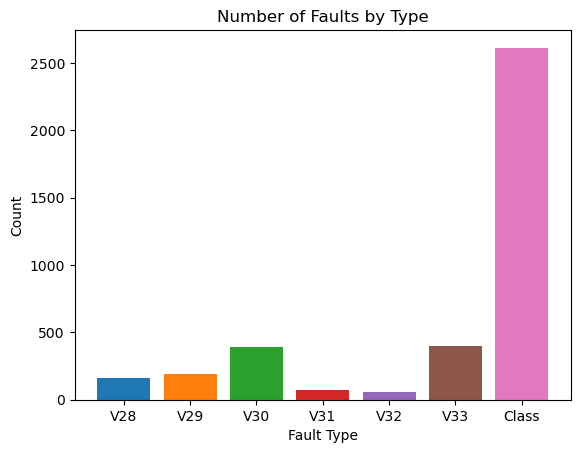

In [10]:
# Bar chart for each fault type
fault_columns = df.columns[-7:]  # last seven columns are fault types
for column in fault_columns:
    plt.bar(column, df[column].sum())
plt.title('Number of Faults by Type')
plt.xlabel('Fault Type')
plt.ylabel('Count')
plt.show()

Now that we have visualized the data, let's remove the columns that may not be relevant for predictive purposes. Since we are only interested in predicting the "Other Faults" type, we can remove the other fault type columns.

In [11]:
# Dropping irrelevant columns
df.drop(['V28', 'V29', 'V30', 'V31', 'V32', 'V33'], axis=1, inplace=True)

In [12]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'Class'],
      dtype='object')

## Standardizing the data

It is generally necessary to standardize the data when creating a KNN model. The KNN algorithm calculates the distance between points in the feature space to determine the k nearest neighbors of a given data point. The distance calculation is based on the scale and unit of measurement of each feature. If the features have different scales or units, some features will dominate the distance calculation, leading to biased results.

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler= StandardScaler()

In [15]:
scaler.fit(df.drop('Class',axis=1))

StandardScaler()

In [16]:
scaled_features= scaler.transform(df.drop('Class',axis=1))

In [17]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27
0,-1.016481,-1.141639,-0.777729,-0.777729,-0.314852,-0.314996,-0.091389,-0.355537,-0.266099,-1.187708,...,-0.486227,-0.575331,0.796401,0.879804,-0.083538,-0.898437,0.528872,1.467656,-1.075752,-0.009490
1,0.141894,0.066403,0.500188,0.500171,-0.345623,-0.338242,-0.124225,-0.380574,-0.017079,-0.384975,...,-0.504888,-0.043290,0.654223,0.879804,-0.581936,-1.157841,0.130174,1.417530,-0.297824,-0.845759
2,0.495362,0.436253,-0.054546,-0.054566,-0.352784,-0.344883,-0.150024,-0.387261,0.449832,-0.277944,...,-0.503191,0.573451,0.571820,0.879804,-0.812814,-1.157841,-0.325764,1.165103,0.057185,-1.091513
3,0.541467,0.486504,-0.722225,-0.722225,-0.332463,-0.328279,-0.089044,-0.365736,0.449832,-0.224429,...,-0.477744,-0.296153,0.796401,0.879804,-0.313021,-1.018897,0.550227,1.519978,-0.171419,-0.189237
4,1.379032,1.382988,-0.649678,-0.649559,0.099692,-0.172201,0.415209,0.079307,-1.480069,-0.224429,...,-0.352206,-1.345434,0.747301,0.879804,1.127655,-0.218461,2.216130,1.698514,-0.456503,1.221636


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [19]:
# Defining X and y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [20]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Class'], test_size=0.3, random_state=0)

In [21]:
# Creating a k-NN classifier object
knn = KNeighborsClassifier()

In [22]:
# Training the classifier on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
# Predicting the response variable for the test data
y_pred = knn.predict(X_test)

C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [24]:
y_pred

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,

In [25]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [26]:
# Calculating the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8113207547169812


In [27]:
# Calculating the confusion matrix of the classifier
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Confusion Matrix:
 [[356  34]
 [ 76 117]]


In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.82      0.91      0.87       390
           2       0.77      0.61      0.68       193

    accuracy                           0.81       583
   macro avg       0.80      0.76      0.77       583
weighted avg       0.81      0.81      0.80       583



### Determining optimal K value

In [29]:
error_rate=[]

for i in range (1, 50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!= y_test))

C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Text(0, 0.5, 'Error Rate')

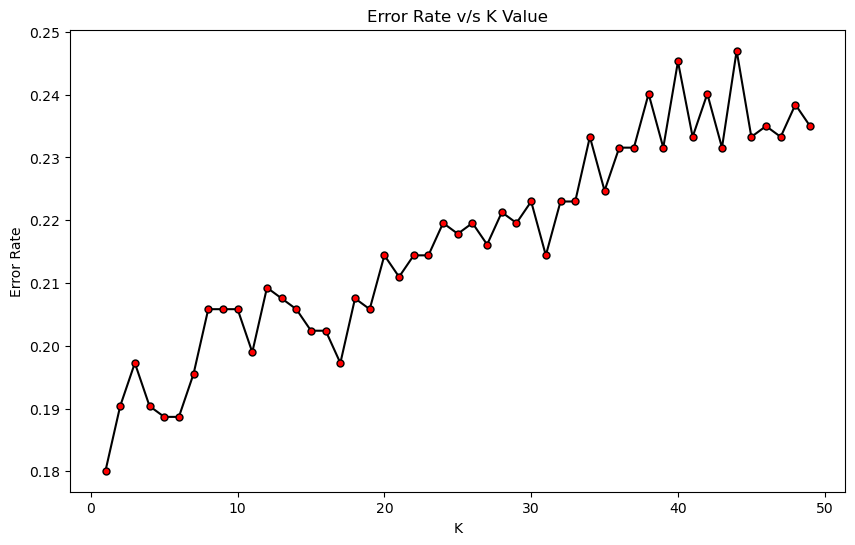

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='black',marker='.',markerfacecolor='red',markersize=10)
plt.title('Error Rate v/s K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

From the above plot it can be observed,
   * The error rate increases with increase in k-value.
   * Error= (1-Accuracy).
   * To avoid the underfitting and overfitting of the model, the optimal k value needs to be selected.
   * The lowest error would give the optimal k-value in this dataset. 
   * So, in this case, optimal k value is assumed to be '1' according to the plot. 

In [31]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[340  50]
 [ 55 138]]
              precision    recall  f1-score   support

           1       0.86      0.87      0.87       390
           2       0.73      0.72      0.72       193

    accuracy                           0.82       583
   macro avg       0.80      0.79      0.80       583
weighted avg       0.82      0.82      0.82       583



C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Considering both Manhattan and Euclidean distance measures.

In [32]:
k_values = list(range(1, 50))
results_manhattan = []
results_euclidean = []

for k in k_values:
    model_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    model_manhattan.fit(X_train, y_train)
    y_pred_manhattan = model_manhattan.predict(X_test)
    acc_manhattan = accuracy_score(y_test, y_pred_manhattan)
    results_manhattan.append(acc_manhattan)

    model_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    model_euclidean.fit(X_train, y_train)
    y_pred_euclidean = model_euclidean.predict(X_test)
    acc_euclidean = accuracy_score(y_test, y_pred_euclidean)
    results_euclidean.append(acc_euclidean)

optimal_k_manhattan = k_values[results_manhattan.index(max(results_manhattan))]
optimal_k_euclidean = k_values[results_euclidean.index(max(results_euclidean))]

C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [33]:
print("Optimal k for Manhattan distance:", optimal_k_manhattan)
print("Optimal k for Euclidean distance:", optimal_k_euclidean)

Optimal k for Manhattan distance: 1
Optimal k for Euclidean distance: 1


In [34]:
knn_euclidean = KNeighborsClassifier(n_neighbors=optimal_k_euclidean, metric='euclidean')
knn_manhattan = KNeighborsClassifier(n_neighbors=optimal_k_manhattan, metric='manhattan')

models = [knn_euclidean, knn_manhattan]
distance_measures = ['Euclidean', 'Manhattan']

for i in range(len(models)):
    model = models[i]
    dm = distance_measures[i]
    model.fit(X, y)
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy using", dm, "distance:", accuracy)

Accuracy using Euclidean distance: 1.0
Accuracy using Manhattan distance: 1.0


C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

### Providing plots of accuracy versus k and confusion matrices for each case.

C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yvams\AppData\Local\Temp\ipykernel_12292\2084902264.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0, 1].set_xticklabels([''] + list(np.unique(y)))
C:\Users\yvams\AppData\Local\Temp\ipykernel_12292\2084902264.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0, 1].set_yticklabels([''] + list(np.unique(y)))
C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors

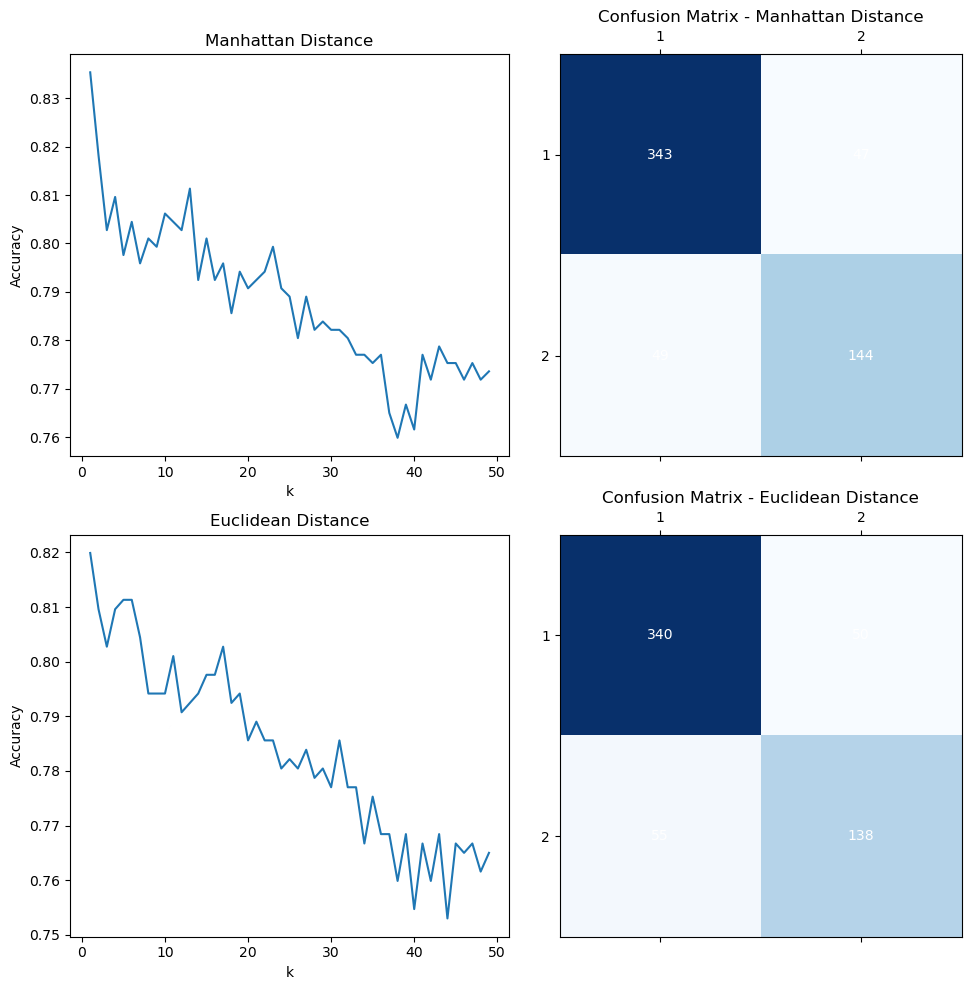

In [35]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

model_manhattan = KNeighborsClassifier(n_neighbors=optimal_k_manhattan, metric='manhattan')
model_manhattan.fit(X_train, y_train)
y_pred_manhattan = model_manhattan.predict(X_test)
acc_manhattan = accuracy_score(y_test, y_pred_manhattan)
cm_manhattan = confusion_matrix(y_test, y_pred_manhattan)

ax[0, 0].plot(k_values, results_manhattan)
ax[0, 0].set_xlabel('k')
ax[0, 0].set_ylabel('Accuracy')
ax[0, 0].set_title('Manhattan Distance')

ax[0, 1].matshow(cm_manhattan, cmap=plt.cm.Blues)
ax[0, 1].set_title('Confusion Matrix - Manhattan Distance')
ax[0, 1].set_xticklabels([''] + list(np.unique(y)))
ax[0, 1].set_yticklabels([''] + list(np.unique(y)))

for i in range(len(np.unique(y))):
    for j in range(len(np.unique(y))):
        ax[0, 1].text(j, i, cm_manhattan[i, j], ha="center", va="center", color="white")

model_euclidean = KNeighborsClassifier(n_neighbors=optimal_k_euclidean, metric='euclidean')
model_euclidean.fit(X_train, y_train)
y_pred_euclidean = model_euclidean.predict(X_test)
acc_euclidean = accuracy_score(y_test, y_pred_euclidean)
cm_euclidean = confusion_matrix(y_test, y_pred_euclidean)

ax[1, 0].plot(k_values, results_euclidean)
ax[1, 0].set_xlabel('k')
ax[1, 0].set_ylabel('Accuracy')
ax[1, 0].set_title('Euclidean Distance')

ax[1, 1].matshow(cm_euclidean, cmap=plt.cm.Blues)
ax[1, 1].set_title('Confusion Matrix - Euclidean Distance')
ax[1, 1].set_xticklabels([''] + list(np.unique(y)))
ax[1, 1].set_yticklabels([''] + list(np.unique(y)))
for i in range(len(np.unique(y))):
    for j in range(len(np.unique(y))):
        ax[1, 1].text(j, i, cm_euclidean[i, j], ha="center", va="center", color="white")

plt.tight_layout()
plt.show()

### Conducting a feature importance study and extracting the most important features.

In [36]:
from sklearn.inspection import permutation_importance

In [37]:
# Creating KNN model with optimal k value and Manhattan distance
model = KNeighborsClassifier(n_neighbors=optimal_k_manhattan, metric='manhattan')

In [38]:
# Fitting the model to the training data
model.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [39]:
# Conducting permutation-based feature importance study
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
std = result.importances_std
indices = np.argsort(importances)[::-1] # argsort sorts in descending order

C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\yvams\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [40]:
print('Feature rankings:')
for f in range(X_test.shape[1]):
    print('%d. Feature %d (%f)' % (f + 1, indices[f], importances[indices[f]]))

Feature rankings:
1. Feature 10 (0.035849)
2. Feature 13 (0.030189)
3. Feature 14 (0.017153)
4. Feature 16 (0.016810)
5. Feature 25 (0.016467)
6. Feature 9 (0.014237)
7. Feature 8 (0.013894)
8. Feature 0 (0.013036)
9. Feature 19 (0.012178)
10. Feature 11 (0.011835)
11. Feature 12 (0.011835)
12. Feature 20 (0.011664)
13. Feature 1 (0.011492)
14. Feature 18 (0.011149)
15. Feature 15 (0.010635)
16. Feature 26 (0.007204)
17. Feature 17 (0.004803)
18. Feature 3 (0.003774)
19. Feature 2 (0.003774)
20. Feature 22 (0.002916)
21. Feature 6 (0.002058)
22. Feature 24 (0.001029)
23. Feature 7 (0.000686)
24. Feature 4 (0.000686)
25. Feature 5 (-0.001029)
26. Feature 21 (-0.003945)
27. Feature 23 (-0.005489)


Feature importance study has been conducted and from the above result it is observed that the most important features are 10 and 13. The least are 5, 21, and 23.